# Network Intrusion Detection Using KNeighborsClassifier

### importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import OneSidedSelection
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
#import dataset
df = pd.read_excel("dataset_final.xlsx")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,ID,Field1,Field2,Field3,Field4,Field5,...,Field34,Field35,Field36,Field37,Field38,Field39,Field40,Field41,Field42,Field43
0,NaN,NaN,NaN,NaN,1,0,tcp,ftp_data,SF,491,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,NaN,NaN,NaN,NaN,2,0,udp,other,SF,146,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,NaN,NaN,NaN,NaN,3,0,tcp,private,S0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,NaN,NaN,NaN,NaN,4,0,tcp,http,SF,232,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,NaN,NaN,NaN,NaN,5,0,tcp,http,SF,199,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


### geting dataset ready for prediction

In [3]:
#remove extra columns 
df = df.drop(["Unnamed: 0", "Unnamed: 1", "Unnamed: 2", "Unnamed: 3", "Field43"], axis=1)

In [4]:
df.isna().sum()

ID         0
Field1     0
Field2     0
Field3     0
Field4     0
Field5     0
Field6     0
Field7     0
Field10    0
Field8     0
Field9     0
Field11    0
Field12    0
Field13    0
Field14    0
Field15    0
Field16    0
Field17    0
Field18    0
Field19    0
Field20    0
Field21    0
Field22    0
Field23    0
Field24    0
Field25    0
Field26    0
Field27    0
Field28    0
Field29    0
Field30    0
Field31    0
Field32    0
Field33    0
Field34    0
Field35    0
Field36    0
Field37    0
Field38    0
Field39    0
Field40    0
Field41    0
Field42    0
dtype: int64

In [5]:
df.head()

,ID,Field1,Field2,Field3,Field4,Field5,Field6,Field7,Field10,Field8,...,Field33,Field34,Field35,Field36,Field37,Field38,Field39,Field40,Field41,Field42
0,1,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,2,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,3,0,tcp,private,S0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,4,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,5,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
df["Field42"].value_counts()

normal             70511
neptune            43187
satan               3786
ipsweep             3777
portsweep           3078
smurf               2769
nmap                1575
back                1002
warezclient          934
teardrop             924
pod                  212
guess_passwd          59
buffer_overflow       31
warezmaster           21
land                  19
imap                  11
loadmodule            10
rootkit               10
ftp_write              9
multihop               7
phf                    4
perl                   3
spy                    2
Name: Field42, dtype: int64

### change sub-categories into their respective attack type

In [7]:
class_1=["normal"]
class_2=["back", "land", "neptune", "pod", "smurf", "teardrop", "mailbomb", "processtable", "udpstor m", "apache2", "worm"]
class_3=["spy", 'guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezclient', 'warezmaster', 'xlock', 'xsnoop', 'snmpgue ss', 'snmpgetattack', 'httptunnel', 'sendmail', 'named']
class_4=['buffer_overflow', 'loadmodule', 'rootkit', 'perl', 'sqlattack', 'xterm', 'ps']
class_5=["satan", "ipsweep", "nmap", "portsweep", "mscan", "sa int"]
class_m=["normal","dos", "r2l", "u2r", "probe"]
sub_class=[class_1, class_2, class_3, class_4, class_5]

In [8]:
dis={}
for i, k in zip(class_m, sub_class):
    for j in k:
        dis[j]=i
print(dis)

{'normal': 'normal', 'back': 'dos', 'land': 'dos', 'neptune': 'dos', 'pod': 'dos', 'smurf': 'dos', 'teardrop': 'dos', 'mailbomb': 'dos', 'processtable': 'dos', 'udpstor m': 'dos', 'apache2': 'dos', 'worm': 'dos', 'spy': 'r2l', 'guess_passwd': 'r2l', 'ftp_write': 'r2l', 'imap': 'r2l', 'phf': 'r2l', 'multihop': 'r2l', 'warezclient': 'r2l', 'warezmaster': 'r2l', 'xlock': 'r2l', 'xsnoop': 'r2l', 'snmpgue ss': 'r2l', 'snmpgetattack': 'r2l', 'httptunnel': 'r2l', 'sendmail': 'r2l', 'named': 'r2l', 'buffer_overflow': 'u2r', 'loadmodule': 'u2r', 'rootkit': 'u2r', 'perl': 'u2r', 'sqlattack': 'u2r', 'xterm': 'u2r', 'ps': 'u2r', 'satan': 'probe', 'ipsweep': 'probe', 'nmap': 'probe', 'portsweep': 'probe', 'mscan': 'probe', 'sa int': 'probe'}


In [9]:
df["Field42"] = df["Field42"].replace(dis)
df.head()

,ID,Field1,Field2,Field3,Field4,Field5,Field6,Field7,Field10,Field8,...,Field33,Field34,Field35,Field36,Field37,Field38,Field39,Field40,Field41,Field42
0,1,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,2,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,3,0,tcp,private,S0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,4,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,5,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [10]:
df["Field42"].value_counts()

normal    70511
dos       48113
probe     12216
r2l        1047
u2r          54
Name: Field42, dtype: int64

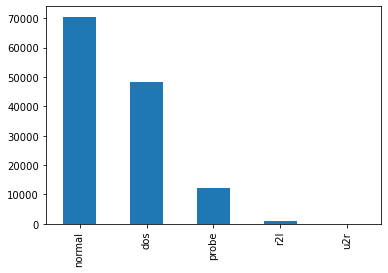

In [11]:
df["Field42"].value_counts().plot.bar();

In [12]:
# provide specific numerical value to each type of attacks

dis_num = {"normal":1,
          "dos":2,
          "r2l":3,
          "u2r":4,
          "probe":5}

In [13]:
df["Field42"]= df["Field42"].replace(dis_num)

In [14]:
df.head()

,ID,Field1,Field2,Field3,Field4,Field5,Field6,Field7,Field10,Field8,...,Field33,Field34,Field35,Field36,Field37,Field38,Field39,Field40,Field41,Field42
0,1,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,2,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,3,0,tcp,private,S0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,2
3,4,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,5,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [15]:
df["Field42"].value_counts()

1    70511
2    48113
5    12216
3     1047
4       54
Name: Field42, dtype: int64

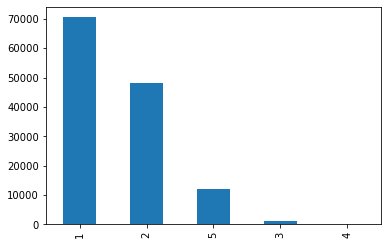

In [16]:
df["Field42"].value_counts().plot.bar();

### spliting data for training and testing

In [17]:
x = df.drop(["ID", "Field4", "Field2", "Field3", "Field42"], axis=1)
y = df["Field42"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [19]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((79164, 38), (79164,), (52777, 38), (52777,))

In [20]:
y_train.value_counts()

1    42401
2    28788
5     7314
3      628
4       33
Name: Field42, dtype: int64

In [21]:
y_test.value_counts()

1    28110
2    19325
5     4902
3      419
4       21
Name: Field42, dtype: int64

## dataset balancing

1. use OSS for over samples
2. use SMOTE for under samples

In [22]:
# OSS
np.random.seed(60)
oss = OneSidedSelection(sampling_strategy="majority")
x_train_o, y_train_o = oss.fit_sample(x_train, y_train)
y_train_o.value_counts()

1    41552
2    28788
5     7314
3      628
4       33
Name: Field42, dtype: int64

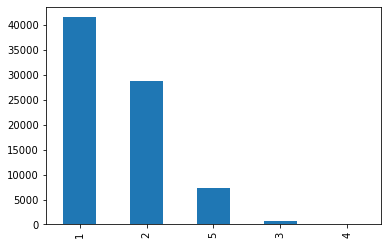

In [23]:
y_train_o.value_counts().plot.bar();

In [24]:
x_train_o.shape, y_train_o.shape

((78315, 38), (78315,))

In [25]:
# SMOTE
sm = SMOTE(sampling_strategy="minority")
x_train_s, y_train_s =  sm.fit_sample(x_train_o, y_train_o)
y_train_s.value_counts()

1    41552
4    41552
2    28788
5     7314
3      628
Name: Field42, dtype: int64

<AxesSubplot:>

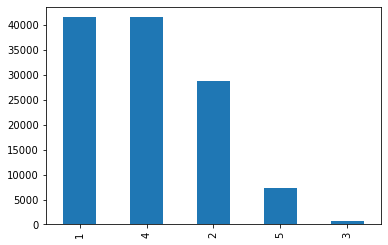

In [26]:
y_train_s.value_counts().plot.bar()

In [27]:
x_train_s.shape, y_train_s.shape

((119834, 38), (119834,))

In [28]:
x_train_s.head()

,Field1,Field5,Field6,Field7,Field10,Field8,Field9,Field11,Field12,Field13,...,Field32,Field33,Field34,Field35,Field36,Field37,Field38,Field39,Field40,Field41
0,2580,146,105,0,0,0,0,0,0,0,...,255,2,0.01,0.85,0.98,0.00,0.00,0.00,0.0,0.0
1,0,246,5363,0,0,0,0,0,1,0,...,25,255,1.00,0.00,0.04,0.03,0.00,0.00,0.0,0.0
2,0,220,2487,0,0,0,0,0,1,0,...,2,255,1.00,0.00,0.50,0.05,0.00,0.00,0.0,0.0
3,2,1644,328,0,0,0,0,0,1,0,...,169,136,0.80,0.04,0.01,0.00,0.00,0.00,0.0,0.0
4,0,281,758,0,0,0,0,0,1,0,...,44,255,1.00,0.00,0.02,0.02,0.02,0.01,0.0,0.0


In [29]:
y_train_s.value_counts()

1    41552
4    41552
2    28788
5     7314
3      628
Name: Field42, dtype: int64

## training and testing using KNeighborsClassifier

In [30]:
nnb = KNeighborsClassifier()
nnb.fit(x_train_s, y_train_s)
nnb.score(x_test, y_test)

0.9780586240218276

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(nnb, x, y)

array([0.99052636, 0.99211763, 0.99026072, 0.9914355 , 0.9923829 ])

In [32]:
y_preds = nnb.predict(x_test)
y_preds

array([1, 1, 5, ..., 2, 1, 2], dtype=int64)

In [33]:
cn_m = confusion_matrix(y_test, y_preds)
cn_m

array([[27298,    58,    30,   210,   514],
       [   20, 19243,     0,     3,    59],
       [   19,     0,   393,     6,     1],
       [    3,     0,     0,    18,     0],
       [   41,   185,     0,     9,  4667]], dtype=int64)

## Evalution

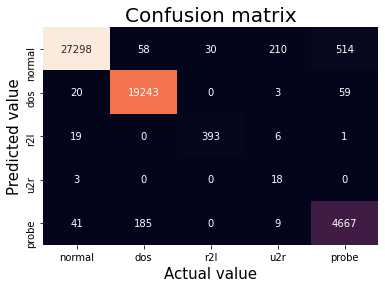

In [34]:
fig, ax = plt.subplots()
ax = sns.heatmap(cn_m, annot= True, fmt='d', cbar=False,
                 xticklabels=["normal", "dos", "r2l", "u2r", "probe"],
                 yticklabels=["normal", "dos", "r2l", "u2r", "probe"]);

plt.xlabel("Actual value",
          fontsize=15)
plt.ylabel("Predicted value",
          fontsize = 15);
plt.title("Confusion matrix",
         fontsize=20);

In [35]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98     28110
           2       0.99      1.00      0.99     19325
           3       0.93      0.94      0.93       419
           4       0.07      0.86      0.13        21
           5       0.89      0.95      0.92      4902

    accuracy                           0.98     52777
   macro avg       0.78      0.94      0.79     52777
weighted avg       0.98      0.98      0.98     52777



In [36]:
accuracy_score(y_test, y_preds)

0.9780586240218276

In [37]:
print(precision_score(y_test, y_preds, average=None))


[0.9969687  0.98752951 0.92907801 0.07317073 0.89047892]


In [38]:
print(f1_score(y_test, y_preds, average=None))


[0.98387126 0.99162609 0.93349169 0.13483146 0.92024056]
